In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Load data

observations_data = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")


In [3]:
# observation_data inspection

print(observations_data.info())
print(observations_data.describe())
#print(observations_data.shape)

# Remove duplicates

observations_data = observations_data.drop_duplicates()

#print(observations_data.shape)

# Check for NaN values 

#observations_data.isnull().values.any()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000


In [4]:
# species_info inspection

print(species_info.info())
print(species_info.describe())
#print(species_info.shape)

# Remove duplicates

#species_info = species_info.drop_duplicates()

#print(species_info.shape)

# Check for NaN values 

#species_info.isnull().values.any()

# Inspect NaN values

#species_info_nan = species_info[species_info["conservation_status"].isnull()]
#species_info_nan["conservation_status"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [5]:
# Replacing species_info.conservation_status' NaN values to appropiate value

# Since this is a DF about endangered species, NaN values of the conservation_status columns mean that that species is not in danger.

# Thus, NaN values will be replaced by "Not Endangered" for better visualization

species_info["conservation_status"] = species_info["conservation_status"].replace(np.nan, "Not Endangered")
species_info_nan = species_info[species_info["conservation_status"].isnull()]
species_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  5824 non-null   object
dtypes: object(4)
memory usage: 182.1+ KB


In [6]:
# Number of unique species and categories. 

print(f"Unique number of species: {species_info.scientific_name.nunique()}.")
print(f"Unique number of categories: {species_info.category.nunique()}")

Unique number of species: 5541.
Unique number of categories: 7


In [7]:
# Inspect Value Counts

# For observation_data DF
print(observations_data.park_name.value_counts())

# For species_info DF

print(species_info.category.value_counts())
print(species_info.conservation_status.value_counts())

Bryce National Park                    5823
Yosemite National Park                 5821
Yellowstone National Park              5819
Great Smoky Mountains National Park    5818
Name: park_name, dtype: int64
Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64
Not Endangered        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


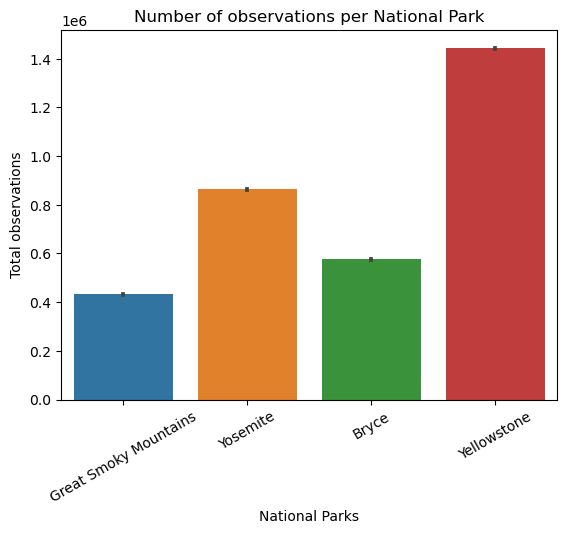

In [8]:
# Initial Visualization - Number of observations per national park

obs_count = sns.barplot(data=observations_data, x = "park_name", y = "observations", estimator = sum)
obs_count.set_xticks(range(0,4))
obs_count.set_xticklabels(labels = ["Great Smoky Mountains", "Yosemite", "Bryce", "Yellowstone"], rotation = 30)
plt.title("Number of observations per National Park")
plt.xlabel("National Parks")
plt.ylabel("Total observations")
plt.show()

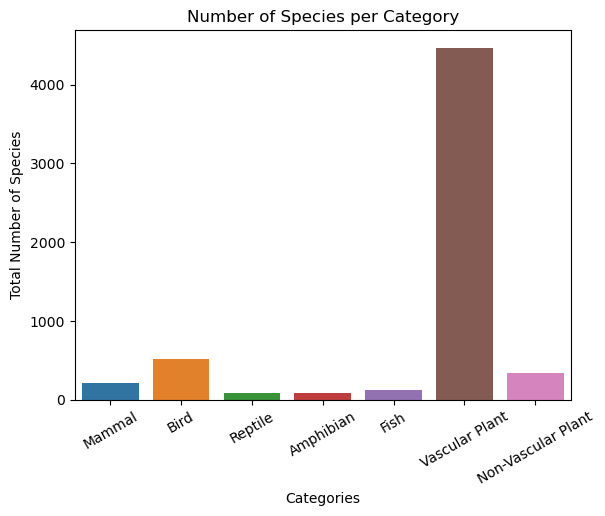

In [9]:
# Initial Visualization - Number of observations per category

cat_count = sns.countplot(data=species_info, x = "category")
cat_count.set_xticks(range(0,7))
cat_count.set_xticklabels(labels = ["Mammal", "Bird", "Reptile", "Amphibian", "Fish", "Vascular Plant", "Non-Vascular Plant"]\
                          , rotation = 30)
plt.title("Number of Species per Category")
plt.xlabel("Categories")
plt.ylabel("Total Number of Species")
plt.show()